In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
head = ['buying','maint','doors','person','lug_boot','safety','decision']

In [3]:
data = pd.read_csv('car.data',names=head)

In [307]:
data.head(3)

,buying,maint,doors,person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [19]:
data.nunique()

buying      4
maint       4
doors       4
person      3
lug_boot    3
safety      3
unacc       4
dtype: int64

In [20]:
data['unacc'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [23]:
data['unacc'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

In [29]:
data.columns

Index(['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'unacc'], dtype='object')

In [34]:
X,y = data[['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety']],data['unacc']

In [50]:
X_train.shape

(1296, 6)

In [51]:
X_test.shape

(432, 6)

In [52]:
print(y_train.shape)

(1296,)


In [53]:
y_train.unique()

array(['acc', 'unacc', 'vgood', 'good'], dtype=object)

In [69]:
res = ['unacc','acc','good','vgood']

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [55]:
y_train[:3]

551       acc
1539    unacc
538     unacc
Name: unacc, dtype: object

In [63]:
le = LabelEncoder()
le.fit_transform(y_train[:20])

array([0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [64]:
le.classes_

array(['acc', 'unacc', 'vgood'], dtype=object)

In [70]:
res

['unacc', 'acc', 'good', 'vgood']

In [71]:
category = pd.Categorical(y,categories = res,ordered = True)

In [72]:
category

[unacc, unacc, unacc, unacc, unacc, ..., unacc, acc, unacc, unacc, unacc]
Length: 1728
Categories (4, object): [unacc < acc < good < vgood]

In [73]:
labels,unique = pd.factorize(category,sort=True)

In [74]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
unique

[unacc, acc, good, vgood]
Categories (4, object): [unacc < acc < good < vgood]

In [76]:
data.dtypes

buying      object
maint       object
doors       object
person      object
lug_boot    object
safety      object
unacc       object
dtype: object

In [77]:
data.nunique()

buying      4
maint       4
doors       4
person      3
lug_boot    3
safety      3
unacc       4
dtype: int64

In [4]:
category_for_all = {}
for i in data.columns:
    print(i,data[i].unique(),end='\n')
    category_for_all[i] = data[i].unique()

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
person ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['low' 'med' 'high']
decision ['unacc' 'acc' 'vgood' 'good']


In [10]:
sample = data[-5:]

In [84]:
sample

,buying,maint,doors,person,lug_boot,safety,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [87]:
sample.apply(le.fit_transform)

,buying,maint,doors,person,lug_boot,safety,unacc
1723,0,0,0,0,1,2,0
1724,0,0,0,0,1,0,2
1725,0,0,0,0,0,1,1
1726,0,0,0,0,0,2,0
1727,0,0,0,0,0,0,2


In [100]:
from collections import defaultdict 
dd = defaultdict(lambda :'HOLI HAIN')

In [101]:
dd['a'] ='wdw'

In [102]:
dd['adwd']

'HOLI HAIN'

In [130]:
del category_for_all

In [128]:
encoder_dict = defaultdict(LabelEncoder)
labeled_data = data.apply(lambda x: encoder_dict[x.name].fit_transform(x))


In [129]:
encoder_dict['buying'].classes_

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [121]:
labeled_data

,buying,maint,doors,person,lug_boot,safety,unacc
1723,0,0,0,0,1,2,0
1724,0,0,0,0,1,0,2
1725,0,0,0,0,0,1,1
1726,0,0,0,0,0,2,0
1727,0,0,0,0,0,0,2


In [131]:
data_refine = data.copy()

In [5]:
category_for_all

{'buying': array(['vhigh', 'high', 'med', 'low'], dtype=object),
 'maint': array(['vhigh', 'high', 'med', 'low'], dtype=object),
 'doors': array(['2', '3', '4', '5more'], dtype=object),
 'person': array(['2', '4', 'more'], dtype=object),
 'lug_boot': array(['small', 'med', 'big'], dtype=object),
 'safety': array(['low', 'med', 'high'], dtype=object),
 'decision': array(['unacc', 'acc', 'vgood', 'good'], dtype=object)}

In [7]:
data_refine = data.copy()

In [84]:
category_for_all_lists = []
for i,j in zip(data_refine.columns,[[ 'low','med','high' ,'vhigh'],[ 'low','med','high' ,'vhigh'],['2' ,'3' ,'4' ,'5more'], ['2' ,'4' ,'more'], ['small' ,'med' ,'big'], ['low', 'med', 'high'], ['unacc' ,'acc', 'good', 'vgood']]):
    num = np.arange(len(j))
    a = dict(zip(j,num))
    print(a)
    category_for_all_lists.append(a)

{'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
{'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
{'2': 0, '3': 1, '4': 2, '5more': 3}
{'2': 0, '4': 1, 'more': 2}
{'small': 0, 'med': 1, 'big': 2}
{'low': 0, 'med': 1, 'high': 2}
{'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}


In [85]:
for a,b in enumerate(sample.columns):
    print(b)
    sample[b] = sample[b].map(category_for_all_lists[a])
    

buying
maint
doors
person
lug_boot
safety
decision


In [86]:
sample.head()

,buying,maint,doors,person,lug_boot,safety,decision
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2
1727,0,0,3,2,2,2,3


In [87]:
category_for_all.keys()

dict_keys(['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'decision'])

In [88]:
sample

,buying,maint,doors,person,lug_boot,safety,decision
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2
1727,0,0,3,2,2,2,3


In [89]:
from sklearn.base import BaseEstimator,TransformerMixin
class converter(BaseEstimator,TransformerMixin):
        def __init__(self,masterbook):
            self.masterbook = masterbook
        def fit(self,X,y=None):
            return self
        def transform(self,X,y=None):
            for a,b in enumerate(X.columns):
                print(b)
                X[b] = X[b].map(self.masterbook[a])
            return X

class converter_label(BaseEstimator,TransformerMixin):
        def __init__(self,masterbook):
            self.masterbook = masterbook
        def fit(self,X,y=None):
            return self
        def transform(self,X,y=None):
            
            return X.map(self.masterbook)

In [90]:
con = converter(category_for_all_lists)
con.fit_transform(sample)

buying
maint
doors
person
lug_boot
safety
decision


,buying,maint,doors,person,lug_boot,safety,decision
1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
categorical_pipeline = Pipeline([
    ('all_to_number',converter(category_for_all_lists)),
    ('scaler',StandardScaler())
])

In [92]:
categorical_feature = data_refine.columns
scale_feature = data_refine.columns[:-1]

In [93]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('categirical_pipeline',categorical_pipeline,scale_feature)
])

In [94]:
sample

,buying,maint,doors,person,lug_boot,safety,decision
1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
sample = data[-5:]
ct.fit_transform(sample)

buying
maint
doors
person
lug_boot
safety


array([[ 0.        ,  0.        ,  0.        ,  0.        , -1.22474487,
        -0.26726124],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.22474487,
         1.06904497],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.81649658,
        -1.60356745],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.81649658,
        -0.26726124],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.81649658,
         1.06904497]])

In [96]:
data_completed = data.copy()

In [97]:
data_completed.columns

Index(['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'decision'], dtype='object')

In [98]:
X , y = data_completed[scale_feature],data_completed['decision']

In [99]:
data_completed.shape

(1728, 7)

In [100]:
last_con = converter_label(category_for_all_lists[-1])
last_con.fit_transform(y)

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: decision, Length: 1728, dtype: int64

In [102]:
from sklearn.utils import shuffle
X,y = shuffle(X),shuffle(y)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)

In [104]:
X_train_transform = ct.fit_transform(X_train)
X_test_transform = ct.transform(X_test)
y_train_transform = last_con.fit_transform(y_train)
y_test_transform = last_con.transform(y_test)


buying
maint
doors
person
lug_boot
safety
buying
maint
doors
person
lug_boot
safety


In [144]:
y_train_transform_encoded.value_counts()

0    1350
1      64
2      54
Name: decision, dtype: int64

In [143]:
y_train_transform_encoded = y_train_transform.apply(lambda x: x-1 if x>0 else x)

In [145]:
y_test_transform_encoded = y_test_transform.apply(lambda x: x-1 if x>0 else x)

In [135]:
y_train[:15]

1671    unacc
1001    unacc
864     unacc
730     unacc
948     unacc
81      unacc
1237     good
1521    unacc
1365    unacc
1078      acc
706     unacc
875       acc
1200    unacc
407     unacc
253     unacc
Name: decision, dtype: object

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
log = LogisticRegression(C=1)
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=75)
dtc = DecisionTreeClassifier(max_depth=8)

In [147]:
log.fit(X_train_transform,y_train_transform_encoded)
svc.fit(X_train_transform,y_train_transform_encoded)
knn.fit(X_train_transform,y_train_transform_encoded)
rfc.fit(X_train_transform,y_train_transform_encoded)
dtc.fit(X_train_transform,y_train_transform_encoded)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
print(log.score(X_train_transform,y_train_transform),
svc.score(X_train_transform,y_train_transform_encoded),
knn.score(X_train_transform,y_train_transform_encoded),
rfc.score(X_train_transform,y_train_transform_encoded),
dtc.score(X_train_transform,y_train_transform_encoded)
)

0.6920980926430518 0.9196185286103542 0.9182561307901907 0.9986376021798365 0.9271117166212534


In [150]:
print(log.score(X_test_transform,y_test_transform_encoded),
svc.score(X_test_transform,y_test_transform_encoded),
knn.score(X_test_transform,y_test_transform_encoded),
rfc.score(X_test_transform,y_test_transform_encoded),
dtc.score(X_test_transform,y_test_transform_encoded)
)

0.9384615384615385 0.9384615384615385 0.9307692307692308 0.9346153846153846 0.9346153846153846


In [110]:
data

,buying,maint,doors,person,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [360]:
pd.crosstab(data['buying'],data['decision'])

decision,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


In [35]:
 price = pd.crosstab(data['buying'],data['decision'])

In [37]:
price

decision,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


<Figure size 1440x864 with 0 Axes>

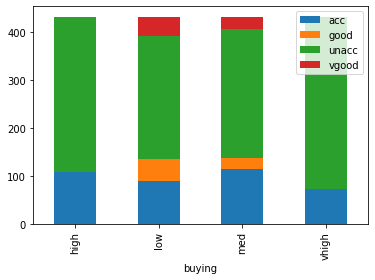

In [49]:
plt.figure(figsize=(20,12))
price.plot.bar(stacked=True)
plt.legend()

<Figure size 1440x864 with 0 Axes>

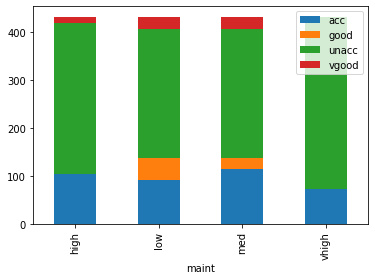

In [53]:
plt.figure(figsize=(20,12))
pd.crosstab(data['maint'],data['decision']).plot.bar(stacked=True)
plt.legend()

In [56]:
scale_feature

Index(['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'], dtype='object')

<Figure size 1440x864 with 0 Axes>

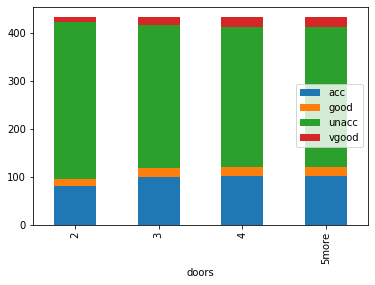

In [74]:
plt.figure(figsize=(20,12))
pd.crosstab(data['doors'],data['decision']).plot.bar(stacked=True)
plt.legend()

<Figure size 720x720 with 0 Axes>

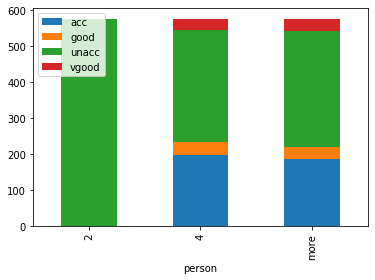

In [76]:
plt.figure(figsize=(10,10))
pd.crosstab(data['person'],data['decision']).plot.bar(stacked=True)
plt.legend()

In [79]:
data['decision'].value_counts().sort_index()

acc       384
good       69
unacc    1210
vgood      65
Name: decision, dtype: int64

In [82]:
for i in scale_feature:
    print(data[i].value_counts())
    print('\n')

med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64


med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64


2        432
5more    432
3        432
4        432
Name: doors, dtype: int64


2       576
more    576
4       576
Name: person, dtype: int64


med      576
small    576
big      576
Name: lug_boot, dtype: int64


med     576
low     576
high    576
Name: safety, dtype: int64




In [111]:
category_for_all_lists

[{'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
 {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
 {'2': 0, '3': 1, '4': 2, '5more': 3},
 {'2': 0, '4': 1, 'more': 2},
 {'small': 0, 'med': 1, 'big': 2},
 {'low': 0, 'med': 1, 'high': 2},
 {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}]

In [115]:
X_train_transform[825]

array([-1.33959294,  1.35565396, -0.45100004, -1.20325422, -1.21980759,
        0.00166069])

In [120]:
data_refine = converter(category_for_all_lists).fit_transform(data_refine)

buying
maint
doors
person
lug_boot
safety
decision


In [124]:
data_refine.iloc[825]

buying      2
maint       0
doors       2
person      1
lug_boot    2
safety      0
decision    0
Name: 825, dtype: int64

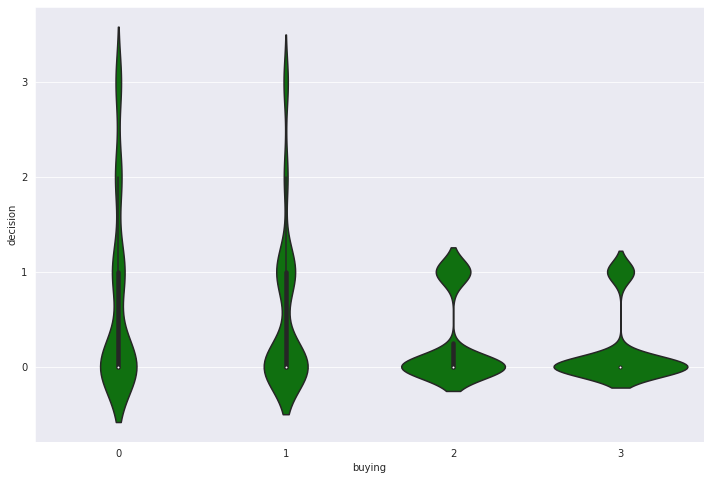

In [128]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.violinplot(x = data_refine['buying'], y = data_refine['decision'], color = 'g')